# Hiragana Character Recognition: CNN vs XGBoost

This notebook explores the effectiveness of two different machine learning models, a Convolutional Neural Network (CNN) and an Extreme Gradient Boosting (XGBoost), in recognizing Hiragana characters from images. The goal is to determine which model achieves a higher accuracy score.

# Define images and labels. Display dataset.

In [2]:
import re
import os
import numpy as np
import pandas as pd
from PIL import Image

location = 'hiragana-dataset/hiragana_images'
dataset_list = os.listdir(location)

dataset_table = np.array(os.listdir('hiragana-dataset/hiragana_images'))
dataset_table = dataset_table.reshape(50,20).transpose()

syllables = [re.compile(r'kana([A-Z]+)').search(f).group(1) for f in dataset_table[0]]

print(f'files under {location}:')
display (pd.DataFrame(dataset_table, columns=syllables))

X = [np.array(Image.open(os.path.join(location, im)).convert('L')) for im in dataset_list]
Y = [syllables.index(s) for s in [re.compile(r'([A-Z]+)').search(f).group(0) for f in dataset_list]]

X = np.array(X)
Y = np.array(Y)

files under hiragana-dataset/hiragana_images:


,A,BA,CHI,DA,E,FU,HA,HE,HI,HO,...,TA,TE,TO,TSU,U,WA,WO,YA,YO,YU
0,kanaA0.jpg,kanaBA0.jpg,kanaCHI0.jpg,kanaDA0.jpg,kanaE0.jpg,kanaFU0.jpg,kanaHA0.jpg,kanaHE0.jpg,kanaHI0.jpg,kanaHO0.jpg,...,kanaTA0.jpg,kanaTE0.jpg,kanaTO0.jpg,kanaTSU0.jpg,kanaU0.jpg,kanaWA0.jpg,kanaWO0.jpg,kanaYA0.jpg,kanaYO0.jpg,kanaYU0.jpg
1,kanaA1.jpg,kanaBA1.jpg,kanaCHI1.jpg,kanaDA1.jpg,kanaE1.jpg,kanaFU1.jpg,kanaHA1.jpg,kanaHE1.jpg,kanaHI1.jpg,kanaHO1.jpg,...,kanaTA1.jpg,kanaTE1.jpg,kanaTO1.jpg,kanaTSU1.jpg,kanaU1.jpg,kanaWA1.jpg,kanaWO1.jpg,kanaYA1.jpg,kanaYO1.jpg,kanaYU1.jpg
2,kanaA10.jpg,kanaBA10.jpg,kanaCHI10.jpg,kanaDA10.jpg,kanaE10.jpg,kanaFU10.jpg,kanaHA10.jpg,kanaHE10.jpg,kanaHI10.jpg,kanaHO10.jpg,...,kanaTA10.jpg,kanaTE10.jpg,kanaTO10.jpg,kanaTSU10.jpg,kanaU10.jpg,kanaWA10.jpg,kanaWO10.jpg,kanaYA10.jpg,kanaYO10.jpg,kanaYU10.jpg
3,kanaA11.jpg,kanaBA11.jpg,kanaCHI11.jpg,kanaDA11.jpg,kanaE11.jpg,kanaFU11.jpg,kanaHA11.jpg,kanaHE11.jpg,kanaHI11.jpg,kanaHO11.jpg,...,kanaTA11.jpg,kanaTE11.jpg,kanaTO11.jpg,kanaTSU11.jpg,kanaU11.jpg,kanaWA11.jpg,kanaWO11.jpg,kanaYA11.jpg,kanaYO11.jpg,kanaYU11.jpg
4,kanaA12.jpg,kanaBA12.jpg,kanaCHI12.jpg,kanaDA12.jpg,kanaE12.jpg,kanaFU12.jpg,kanaHA12.jpg,kanaHE12.jpg,kanaHI12.jpg,kanaHO12.jpg,...,kanaTA12.jpg,kanaTE12.jpg,kanaTO12.jpg,kanaTSU12.jpg,kanaU12.jpg,kanaWA12.jpg,kanaWO12.jpg,kanaYA12.jpg,kanaYO12.jpg,kanaYU12.jpg
5,kanaA13.jpg,kanaBA13.jpg,kanaCHI13.jpg,kanaDA13.jpg,kanaE13.jpg,kanaFU13.jpg,kanaHA13.jpg,kanaHE13.jpg,kanaHI13.jpg,kanaHO13.jpg,...,kanaTA13.jpg,kanaTE13.jpg,kanaTO13.jpg,kanaTSU13.jpg,kanaU13.jpg,kanaWA13.jpg,kanaWO13.jpg,kanaYA13.jpg,kanaYO13.jpg,kanaYU13.jpg
6,kanaA14.jpg,kanaBA14.jpg,kanaCHI14.jpg,kanaDA14.jpg,kanaE14.jpg,kanaFU14.jpg,kanaHA14.jpg,kanaHE14.jpg,kanaHI14.jpg,kanaHO14.jpg,...,kanaTA14.jpg,kanaTE14.jpg,kanaTO14.jpg,kanaTSU14.jpg,kanaU14.jpg,kanaWA14.jpg,kanaWO14.jpg,kanaYA14.jpg,kanaYO14.jpg,kanaYU14.jpg
7,kanaA15.jpg,kanaBA15.jpg,kanaCHI15.jpg,kanaDA15.jpg,kanaE15.jpg,kanaFU15.jpg,kanaHA15.jpg,kanaHE15.jpg,kanaHI15.jpg,kanaHO15.jpg,...,kanaTA15.jpg,kanaTE15.jpg,kanaTO15.jpg,kanaTSU15.jpg,kanaU15.jpg,kanaWA15.jpg,kanaWO15.jpg,kanaYA15.jpg,kanaYO15.jpg,kanaYU15.jpg
8,kanaA16.jpg,kanaBA16.jpg,kanaCHI16.jpg,kanaDA16.jpg,kanaE16.jpg,kanaFU16.jpg,kanaHA16.jpg,kanaHE16.jpg,kanaHI16.jpg,kanaHO16.jpg,...,kanaTA16.jpg,kanaTE16.jpg,kanaTO16.jpg,kanaTSU16.jpg,kanaU16.jpg,kanaWA16.jpg,kanaWO16.jpg,kanaYA16.jpg,kanaYO16.jpg,kanaYU16.jpg
9,kanaA17.jpg,kanaBA17.jpg,kanaCHI17.jpg,kanaDA17.jpg,kanaE17.jpg,kanaFU17.jpg,kanaHA17.jpg,kanaHE17.jpg,kanaHI17.jpg,kanaHO17.jpg,...,kanaTA17.jpg,kanaTE17.jpg,kanaTO17.jpg,kanaTSU17.jpg,kanaU17.jpg,kanaWA17.jpg,kanaWO17.jpg,kanaYA17.jpg,kanaYO17.jpg,kanaYU17.jpg


In [3]:
# open hiragana_dataset3.csv
import csv

images = [f'hiragana-dataset/hiragana_images/{f}' for f in dataset_list]
labels = [syllables[i] for i in Y]

# doing image_with_label = [images, labels] gives an untransposed list
# performing list(zip()) transposes the rows and columns
image_with_label = list(zip(images, labels))

# Write the data to a CSV file
csv_file = 'hiragana_dataset3.csv'
with open(csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['ImageName', 'Label'])  # Write header
    csvwriter.writerows(image_with_label)

print(f'Data written to {csv_file}:')

cv = pd.read_csv(csv_file, keep_default_na=False)
cv.sample(n=10)

Data written to hiragana_dataset3.csv:


,ImageName,Label
828,hiragana-dataset/hiragana_images/kanaTE16.jpg,TE
936,hiragana-dataset/hiragana_images/kanaWO6.jpg,WO
451,hiragana-dataset/hiragana_images/kanaN19.jpg,N
660,hiragana-dataset/hiragana_images/kanaRO0.jpg,RO
454,hiragana-dataset/hiragana_images/kanaN4.jpg,N
701,hiragana-dataset/hiragana_images/kanaSA1.jpg,SA
153,hiragana-dataset/hiragana_images/kanaHE3.jpg,HE
691,hiragana-dataset/hiragana_images/kanaRU19.jpg,RU
289,hiragana-dataset/hiragana_images/kanaKI17.jpg,KI
834,hiragana-dataset/hiragana_images/kanaTE4.jpg,TE


length of dataset: 999


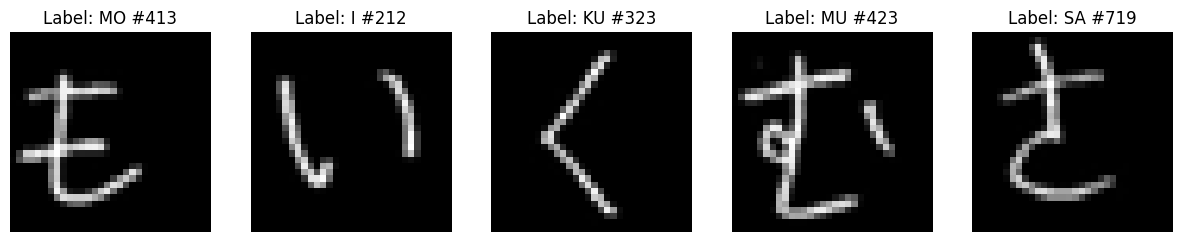

In [4]:
from PIL import Image
img_width, img_height = 32, 32

# Load images and labels
images = []
labels = []
for index, row in cv.iterrows():
    img = Image.open(row['ImageName']).convert('L')  # convert image to grayscale
    img = img.resize((img_width, img_height))
    img_array = np.array(img)
    images.append(img_array)
    label = row['Label']
    if pd.isna(label) or label == 'NA':
        label = 'NA'
    labels.append(label)
images = np.array(images)

# plot images with labels
import matplotlib.pyplot as plt
import random

dataset_len = len(labels) - 1
print('length of dataset:', dataset_len)
fig, axs = plt.subplots(1,5, figsize=(15,3))
axs = axs.flatten()

for i in range(5):
    ran = random.randint(0, dataset_len)
    ax = axs[i]
    ax.imshow(images[ran].reshape(img_width, img_height), cmap='gray')
    ax.set_title("Label: " + labels[ran] + f' #{ran}')
    ax.axis('off')

# perform CNN

In [7]:
# Flatten Image Data and Create Labeled DataFrame

flat_images = images.reshape((images.shape[0], -1))

# Create column names for the pixel values
pixel_columns = [f'pixel_{i+1}' for i in range(flat_images.shape[1])]

# Create the DataFrame
df = pd.DataFrame(flat_images, columns=pixel_columns)
df['label'] = labels

display(df.sample(10))

# Separate features and labels
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_label_encoded = label_encoder.fit_transform(df['label'])

# Fetch pixel values
X_flatten = df[pixel_columns].values

# Reshape the data back to 2D images
X_onehot = X_flatten.reshape((-1, img_width, img_height, 1))

# Convert labels to one-hot encoding
Y_onehot = tf.keras.utils.to_categorical(Y_label_encoded)

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_onehot, Y_onehot, test_size=0.2, random_state=42)

# Use this dataset for evaluation (see bottom section)
cnn_dataset = dict(zip(
    ['X_train', 'X_test', 'Y_train', 'Y_test'],
    [X_train, X_test, Y_train, Y_test]
))

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,pixel_1024,label
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MI
641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RI
536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NO
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NI
405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,MO
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HI
863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSU
679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RO
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BA
474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NA


In [8]:
# Build the CNN model
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

cnn = models.Sequential([
    layers.Input((img_width, img_height, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(Y)), activation='softmax')
], name='CNN')

cnn.summary()

# Compile the model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
cnn.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Evaluate the model
test_loss, test_acc = cnn.evaluate(X_test, Y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,594 (486.70 KB)

 Trainable params: 124,594 (486.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0371 - loss: 10.8497 - val_accuracy: 0.1450 - val_loss: 3.4711
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2146 - loss: 3.1532 - val_accuracy: 0.3650 - val_loss: 2.3261
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4934 - loss: 1.8381 - val_accuracy: 0.6350 - val_loss: 1.2921
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7669 - loss: 0.9444 - val_accuracy: 0.7200 - val_loss: 1.0221
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8870 - loss: 0.4077 - val_accuracy: 0.7900 - val_loss: 0.7058
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9648 - loss: 0.1255 - val_accuracy: 0.8550 - val_loss: 0.5187
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9733 - loss: 0.0773 - val_accuracy: 0.8900 - val_loss: 0.4896
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9920 - loss: 0.0382 - val_accuracy: 0.8900 - 

# perform SVR

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Flatten the image data
X_transpose = X_onehot.reshape(X_onehot.shape[0], -1)
X_train, X_test, Y_train, Y_test = train_test_split(X_transpose, Y, test_size=0.2, random_state=42)

# Use this dataset for evaluation (see bottom section)
svr_dataset = dict(zip(
    ['X_train', 'X_test', 'Y_train', 'Y_test'],
    [X_train, X_test, Y_train, Y_test]
))

# Define the scaler and the SVR model
scaler = StandardScaler()
svc = SVC(kernel='rbf')

# Create a pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('svc', svc)
])

# Define the hyperparameters to tune
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01]
}

In [7]:
# Perform Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grid_search_svm = GridSearchCV(pipeline, param_grid, cv=2, scoring='accuracy')
grid_search_svm.name = 'SVR'
grid_search_svm.fit(X_train, Y_train)
model_svm = grid_search_svm.best_estimator_

svm_predictions = grid_search_svm.predict(X_test)
accuracy = accuracy_score(Y_test, svm_predictions)

print(f"Grid Search Accuracy: {accuracy}")

Grid Search Accuracy: 0.76


# perform XGBoost

In [8]:
# build a convolution network and minimize features to 100
# the convolution network doesn't need training
n_features = 100

conv = tf.keras.Sequential([
    tf.keras.layers.Input((X.shape[1], X.shape[2], 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_features, activation='relu'),
])

print('convolution output shape (number of features):', conv.output_shape)

convolution output shape (number of features): (None, 100)


In [9]:
# input must be flattened. the model is based on 1d row input and 1d column output
# we will be using the conv model's output to feed 1000 features per image to XGBoost
X_conv = conv.predict(X)

# Perform stratified split for our dataset
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_conv, Y,
                                                  test_size = 0.1,
                                                  stratify = Y,
                                                  random_state = 19)

# Use this dataset for evaluation (see bottom section)
xgb_dataset = dict(zip(
    ['X_train', 'X_test', 'Y_train', 'Y_test'],
    [X_train, X_val, Y_train, Y_val]
))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [10]:
# build and train XGBoost model
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# do not use objective='binary:logistic'
# we have fifty classes so this is not a binary classification
xgb = XGBClassifier(objective='multi:softmax', random_state=0, verbosity=3)
# these were proven to be the best hyperparameters
xgb_params = {
              'colsample_bytree': [0.7],
              'learning_rate': [0.9],
              'max_depth': [6],
              'min_child_weight': [5],
              'n_estimators': [15],
              'subsample': [.71],
              }

xgb_cv = GridSearchCV(xgb,
                      xgb_params,
                      scoring = 'accuracy',
                      cv = 7,
                      refit = 'f1'
                     )
xgb_cv = xgb_cv.fit(X_train, Y_train)
xgb_cv.name = 'XGBoost'

display(xgb_cv)

best_model = xgb_cv.best_estimator_
Y_pred = best_model.predict(X_val)
accuracy = accuracy_score(Y_val, Y_pred)

print(f"Accuracy: {accuracy}")

[20:44:08] ======== Monitor (0): HostSketchContainer ========
[20:44:08] AllReduce: 0.000613s, 1 calls @ 613us

[20:44:08] MakeCuts: 0.000985s, 1 calls @ 985us

[20:44:08] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[20:44:08] ======== Monitor (0): Learner ========
[20:44:08] Configure: 0.000486s, 1 calls @ 486us

[20:44:08] EvalOneIter: 0.000157s, 15 calls @ 157us

[20:44:08] GetGradient: 0.005823s, 15 calls @ 5823us

[20:44:08] PredictRaw: 2.9e-05s, 15 calls @ 29us

[20:44:08] UpdateOneIter: 0.300893s, 15 calls @ 300893us

[20:44:08] ======== Monitor (0): GBTree ========
[20:44:08] BoostNewTrees: 0.294366s, 15 calls @ 294366us

[20:44:08] CommitModel: 5.1e-05s, 15 calls @ 51us

[20:44:08] ======== Monitor (0): HistUpdater ========
[20:44:08] BuildHistogram: 0.070732s, 669 calls @ 70732us

[20:44:08] EvaluateSplits: 0.06679s, 1419 calls @ 66790us

[20:44:08] InitDa

GridSearchCV(cv=7,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.9],
                         'max_depth': [6], 'min_child_weight': [5],
                         'n_estimators': [15], 'subsample': [0.71]},
             refit='f1', scoring='accuracy')

[20:44:10] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
Accuracy: 0.75


# Perform LSTM

In [9]:
# Perform stratified split for our dataset
Y_onehot = tf.keras.utils.to_categorical(Y)

from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y_onehot,
                                                  test_size = 0.1,
                                                  stratify = Y_onehot,
                                                  random_state = 19)

# Use this dataset for evaluation (see bottom section)
lstm_dataset = dict(zip(
    ['X_train', 'X_test', 'Y_train', 'Y_test'],
    [X_train, X_val, Y_train, Y_val]
))

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

units = 300

lstm = tf.keras.Sequential([
    tf.keras.layers.Input((X.shape[1], X.shape[2], 1)),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Reshape([1,756]),
    tf.keras.layers.LSTM(units, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(50, activation='softmax'),
], name='LSTM')

lstm.summary()

# Compile the model
lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
lstm.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val))

# Evaluate the model
test_loss, test_acc = lstm.evaluate(X_val, Y_val, verbose=2)
print(f'Test accuracy: {test_acc}')

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 28, 27, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 756)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 1, 756)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 300)            │     1,268,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         3,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,308,214 (4.99 MB)

 Trainable params: 1,308,214 (4.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.0307 - loss: 26.0488 - val_accuracy: 0.1000 - val_loss: 4.7688
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0836 - loss: 4.4517 - val_accuracy: 0.1200 - val_loss: 3.6636
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0974 - loss: 3.6119 - val_accuracy: 0.1500 - val_loss: 3.3887
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1731 - loss: 3.1172 - val_accuracy: 0.2200 - val_loss: 3.0488
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2694 - loss: 2.7786 - val_accuracy: 0.3000 - val_loss: 2.8276
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3168 - loss: 2.5318 - val_accuracy: 0.3300 - val_loss: 2.7930
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3709 - loss: 2.2283 - val_accuracy: 0.3600 - val_loss: 2.4935
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4648 - loss: 2.0126 - val_accuracy: 0

# Evaluate Performance between Models

In [15]:
# does every model exist?
assert [cnn, grid_search_svm, xgb_cv, lstm]
# does every dataset exist?
assert [cnn_dataset, svr_dataset, xgb_dataset, lstm_dataset]

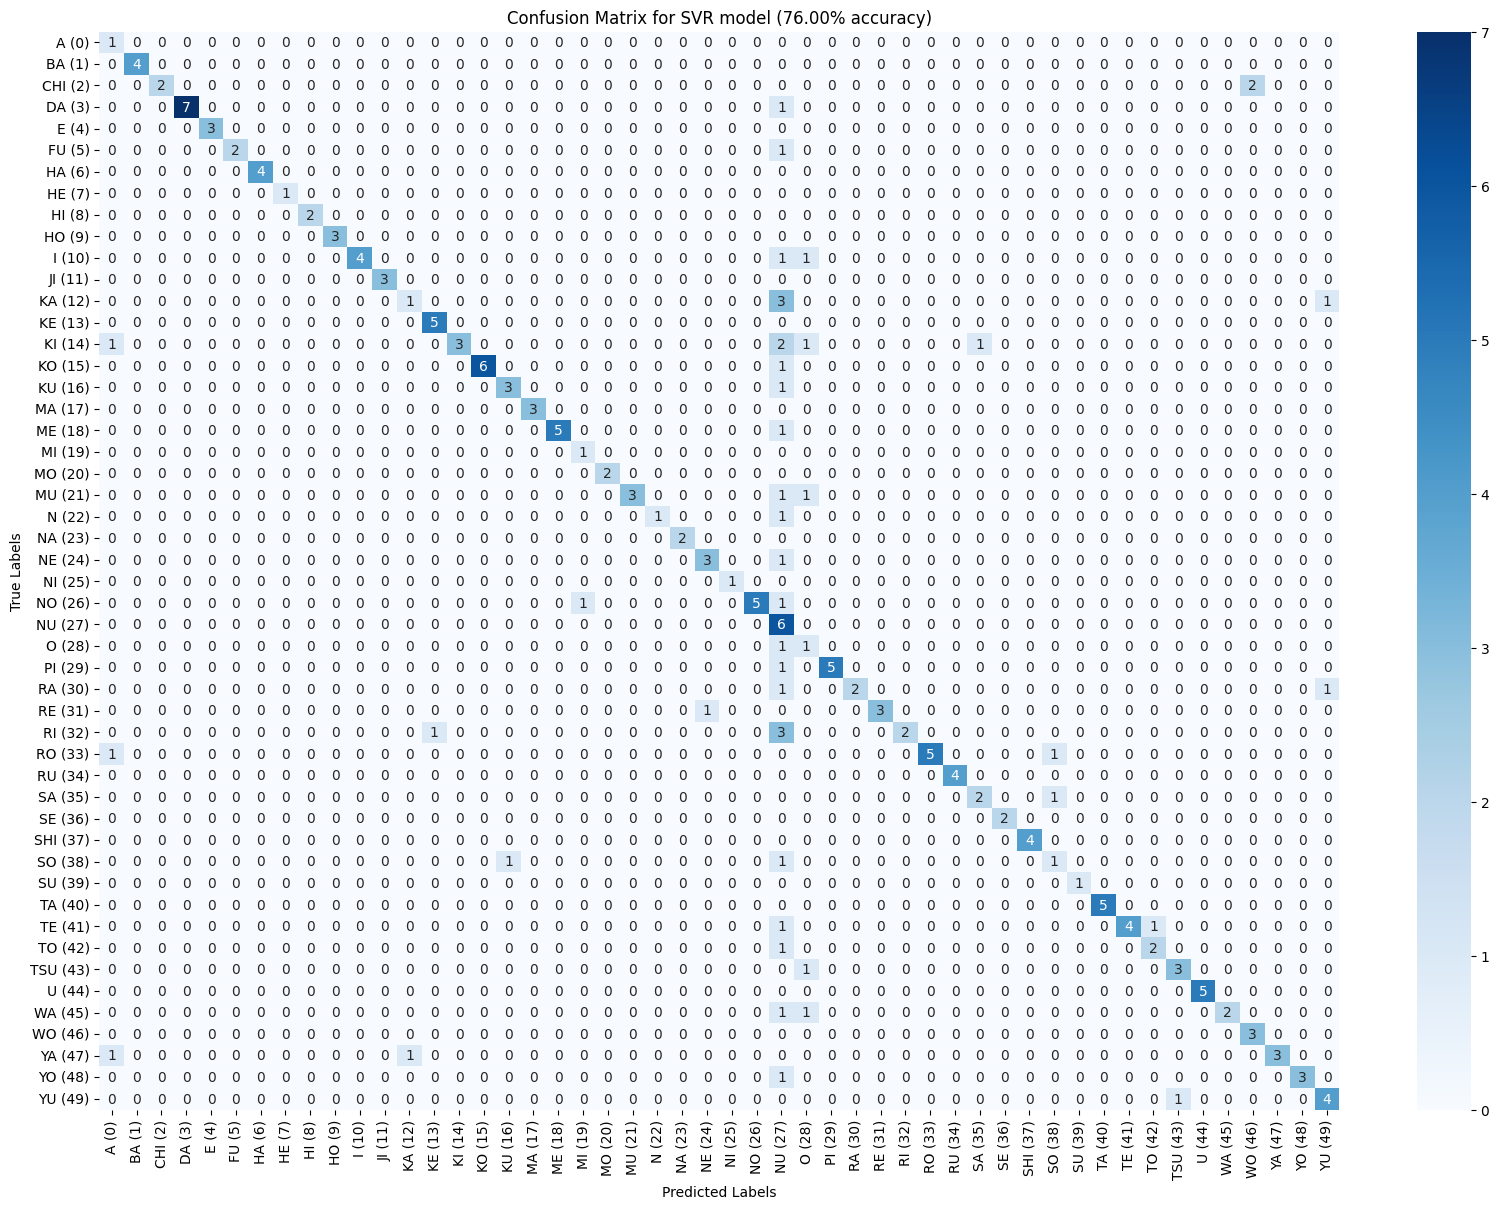

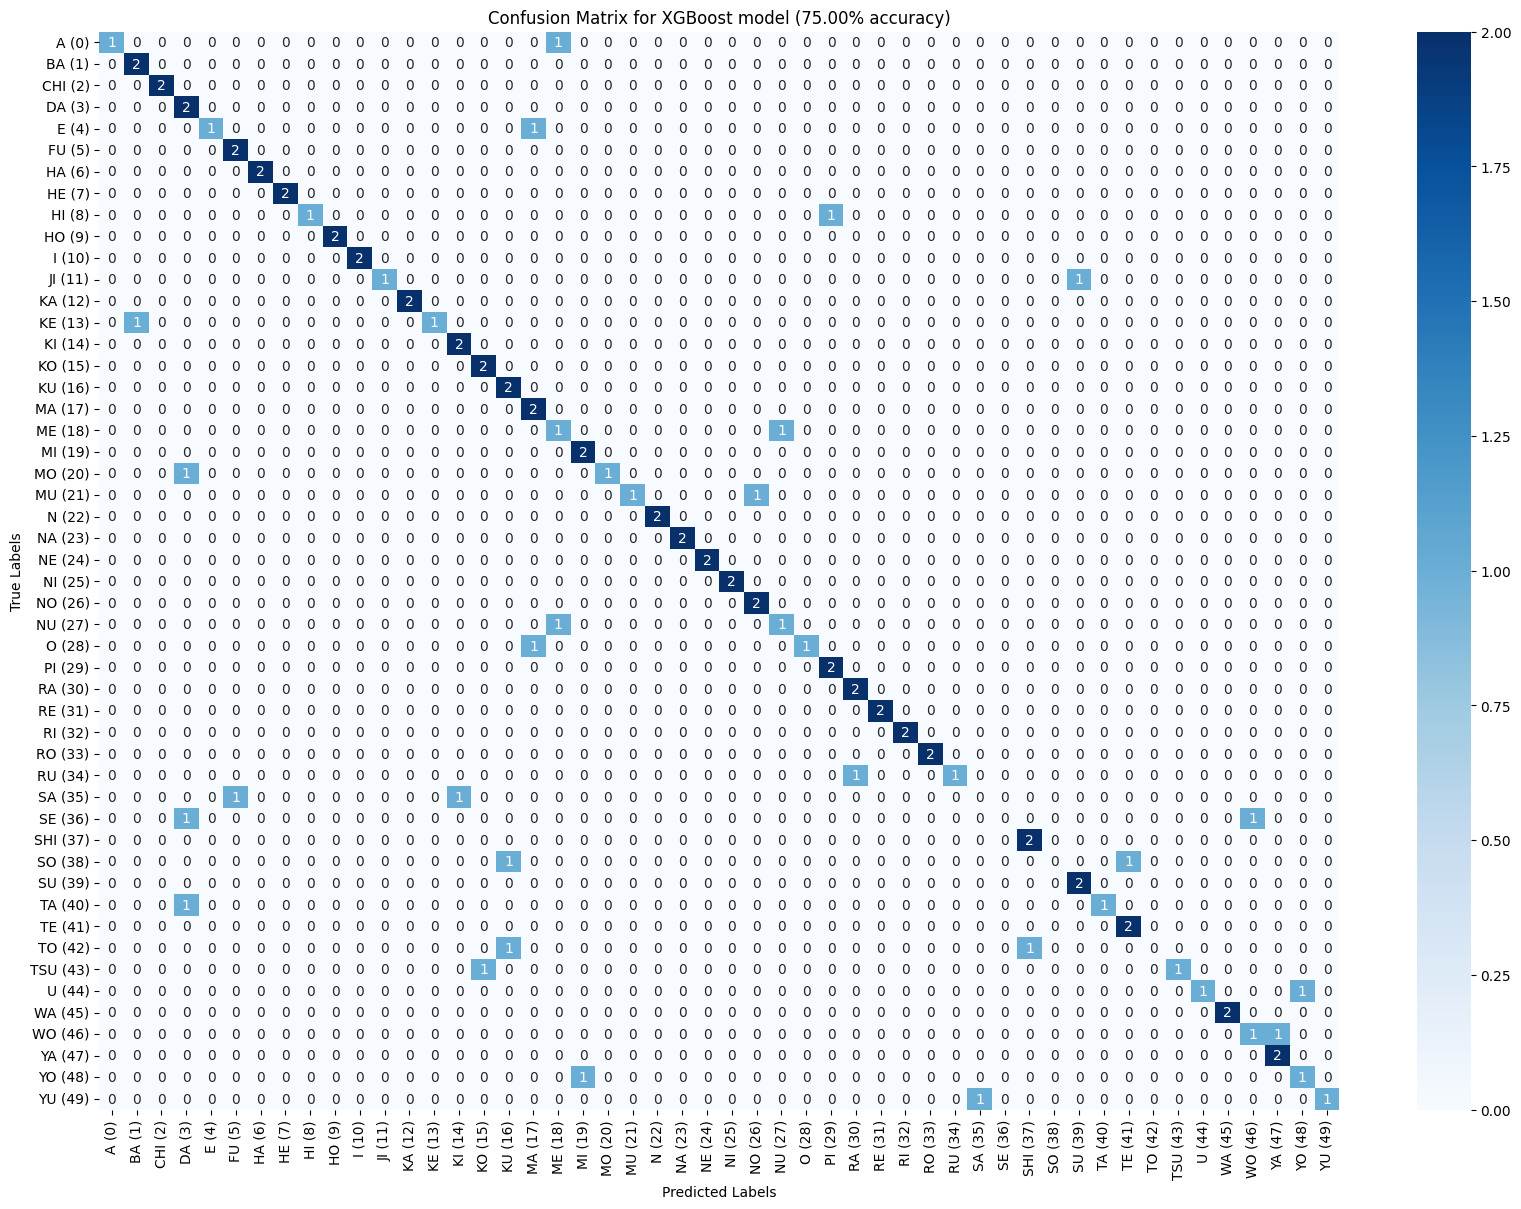

In [16]:
# evaluate models with appropriate datasets

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# for model, dataset in zip([cnn, grid_search_svm, xgb_cv], [cnn_dataset, svr_dataset, xgb_dataset]):
for model, dataset in zip([grid_search_svm, xgb_cv], [svr_dataset, xgb_dataset]):
    # get Y_val and Y_pred
    Y_val = dataset['Y_test']
    Y_pred = model.predict(dataset['X_test'])

    accuracy = accuracy_score(Y_val, Y_pred)

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(Y_val, Y_pred)

    # Convert confusion matrix to DataFrame for better visualization
    conf_matrix_df = pd.DataFrame(conf_matrix,
                                index=[f'{syllables[i]} ({i})' for i in range(conf_matrix.shape[0])],
                                columns=[f'{syllables[i]} ({i})' for i in range(conf_matrix.shape[1])])

    # Plot the confusion matrix
    plt.figure(figsize=(20, 14))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model.name} model ({accuracy*100:.2f}% accuracy)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()